# Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
sns.set_theme()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Import Data

In [3]:
region = 'EU'
#region = 'US'

In [4]:
ss_dict = pd.read_excel(f"./data/Superstore_{region}.xls", sheet_name=None)
ss_dict.keys()

dict_keys(['Orders', 'Returns', 'People'])

In [5]:
orders = ss_dict['Orders'].drop(columns=["Row ID"])
returns = ss_dict['Returns']
people = ss_dict['People']

In [6]:
orders.head(1)

,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Postcode
0,DE-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Hamburg,Hamburg,Germany,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.448,2,0.2,5.5512,NaN


### Join Data

In [7]:
df = orders.merge(returns, how="left", on="Order ID").merge(people, how="left", on="Region")
df.head(1)

,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Postcode,Returned,Regional Manager
0,DE-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Hamburg,Hamburg,Germany,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.448,2,0.2,5.5512,NaN,NaN,Emily Burns


In [8]:
if 'Ship Mode' in df.columns:
    df = df.rename(columns={"Ship Mode":"Delivery Mode"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          10194 non-null  object        
 1   Order Date        10194 non-null  datetime64[ns]
 2   Dispatch Date     10194 non-null  datetime64[ns]
 3   Delivery Mode     10194 non-null  object        
 4   Customer ID       10194 non-null  object        
 5   Customer Name     10194 non-null  object        
 6   Segment           10194 non-null  object        
 7   City              10194 non-null  object        
 8   State/Province    10194 non-null  object        
 9   Country/Region    10194 non-null  object        
 10  Region            10194 non-null  object        
 11  Product ID        10194 non-null  object        
 12  Category          10194 non-null  object        
 13  Sub-Category      10194 non-null  object        
 14  Product Name      1019

---

In [10]:
df = df.dropna(axis=1, how="all")
df.shape

(10194, 21)

### Unit Price

In [11]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].head(1)

,Sales,Quantity,Discount,Profit
0,16.448,2,0.2,5.5512


In [12]:
df['Sales Pre-Discount'] = df.Sales / (1 - df['Discount'])
df['Unit Price'] = df['Sales Pre-Discount'] / df['Quantity']
df.Returned = ~df.Returned.isna()

In [13]:
df.describe(include=['O'])

,Order ID,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Regional Manager
count,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194,10194
unique,5112,4,804,800,3,615,105,15,3,1862,3,17,1849,3
top,UK-2024-100111,Standard Class,WB-21850,William Brown,Consumer,London,England,France,Central,FUR-FU-10004270,Office Supplies,Binders,Staples,Emily Burns
freq,14,6120,41,41,5281,915,1880,2560,5869,20,6128,1548,50,5869


In [14]:
df.describe(exclude=['O'])

,Order Date,Dispatch Date,Sales,Quantity,Discount,Profit,Returned,Sales Pre-Discount,Unit Price
count,10194,10194,10194.000000,10194.000000,10194.000000,10194.000000,10194,10194.000000,10194.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,9394,NaN,NaN
mean,2023-04-30 00:15:40.788699136,2023-05-03 23:20:43.790465024,228.225854,3.791838,0.155385,28.673417,NaN,284.230582,75.186039
min,2021-01-03 00:00:00,2021-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,NaN,0.990000,0.990000
25%,2022-05-14 00:00:00,2022-05-19 00:00:00,17.220000,2.000000,0.000000,1.760800,NaN,21.240000,6.480000
50%,2023-06-25 00:00:00,2023-06-28 00:00:00,53.910000,3.000000,0.200000,8.690000,NaN,64.745000,19.980000
75%,2024-05-14 00:00:00,2024-05-18 00:00:00,209.500000,5.000000,0.200000,29.297925,NaN,248.447500,73.950000
max,2024-12-30 00:00:00,2025-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,NaN,45276.960000,7546.160000


In [15]:
df.to_csv("./data/superstore_processed.csv", index=False)

# EDA
## Investigate each column

### Customer ID / Name

In [16]:
x, y = "Customer Name", "Customer ID"
data = df[[x, y]]
data.head(3)

,Customer Name,Customer ID
0,Darren Powers,DP-13000
1,Phillina Ober,PO-19195
2,Phillina Ober,PO-19195


In [17]:
data.groupby(x)[y].nunique().sort_values(ascending=False).head(3)

Customer Name
Harry Olson      5
Aaron Bergman    1
Aaron Hawkins    1
Name: Customer ID, dtype: int64

In [18]:
ho = (df.loc[df[x] == "Harry Olson"])
ho.head(3)

,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Regional Manager,Sales Pre-Discount,Unit Price
2036,FR-2021-143500,2021-12-30,2022-01-03,Standard Class,HO-15230,Harry Olson,Consumer,Roissy-en-Brie,Ile-de-France,France,Central,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,3.024,3,0.2,-0.6048,False,Emily Burns,3.78,1.26
5009,FR-2023-121465,2023-06-12,2023-06-17,Standard Class,HO-15234,Harry Olson,Consumer,Roissy-en-Brie,Ile-de-France,France,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,140.670,3,0.0,54.8613,False,Emily Burns,140.67,46.89
5010,FR-2023-121465,2023-06-12,2023-06-17,Standard Class,HO-15233,Harry Olson,Consumer,Roissy-en-Brie,Ile-de-France,France,Central,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",19.680,5,0.2,6.8880,False,Emily Burns,24.60,4.92


In [19]:
ho.groupby("Order ID")['Customer ID'].unique()

Order ID
FR-2021-143500                                  [HO-15230]
FR-2023-121465    [HO-15234, HO-15233, HO-15232, HO-15231]
FR-2024-130494    [HO-15234, HO-15233, HO-15232, HO-15231]
FR-2024-143500                                  [HO-15230]
Name: Customer ID, dtype: object

In [20]:
ho['Order ID'].value_counts()

Order ID
FR-2023-121465    4
FR-2024-130494    4
FR-2021-143500    1
FR-2024-143500    1
Name: count, dtype: int64

### Customer Name / Order ID

In [21]:
x, y = "Customer Name", "Order ID"
data = df.groupby(x)[y].nunique().sort_values(ascending=False)
data.head()

Customer Name
Emily Phan           17
Bart Pistole         14
Suzanne McNair       14
Eugene Hildebrand    14
Noel Staavos         13
Name: Order ID, dtype: int64

In [22]:
data.sum()

np.int64(5112)

### Order ID

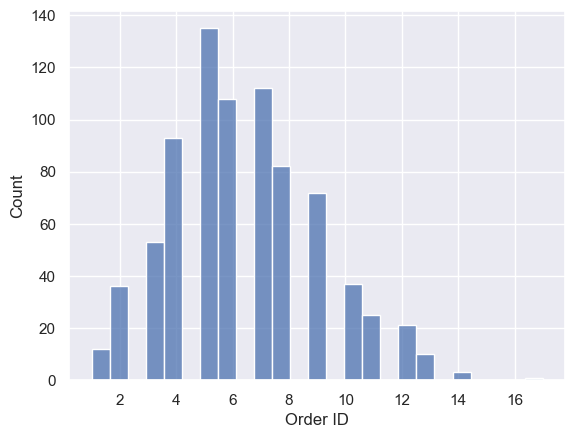

In [23]:
sns.histplot(data);

### Delivery Mode

In [24]:
def get_vc(data, col):
    data = data[col].value_counts(normalize=True).reset_index()
    display(data)
    x, y = data.columns
    num_x_cats = data[x].nunique()
    horizontal = num_x_cats > 10

    if horizontal:
        x, y = y, x
    ax = sns.barplot(data=data, x=x, y=y, hue=x, palette="flare" if horizontal else None, legend=False)
    
    if horizontal:
        plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0)) 
    else:
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  

    if len(ax.get_xticklabels()) > 4:
        plt.xticks(rotation=45)

    plt.show()


,Delivery Mode,proportion
0,Standard Class,0.600353
1,Second Class,0.194134
2,First Class,0.151854
3,Same Day,0.053659


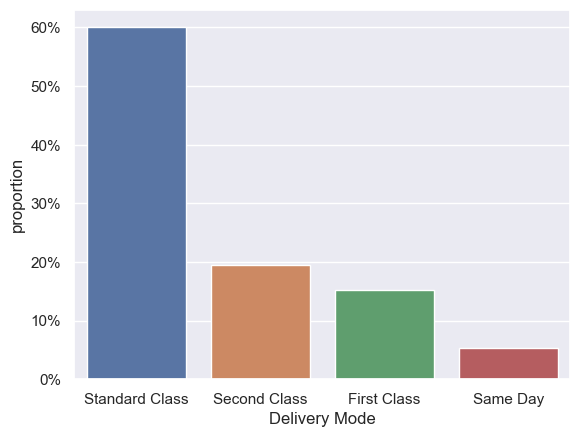

In [25]:
get_vc(df, 'Delivery Mode')

### Segment

,Segment,proportion
0,Consumer,0.518050
1,Corporate,0.303119
2,Home Office,0.178831


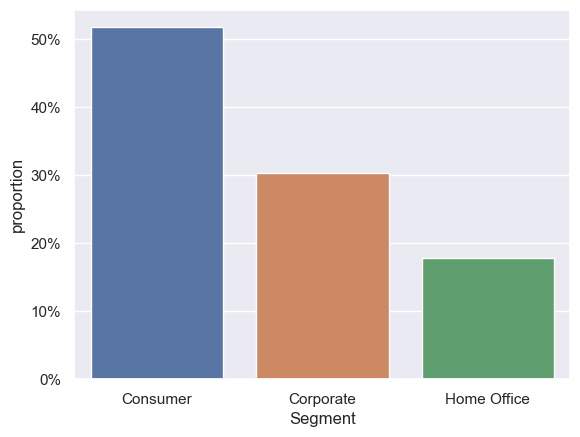

In [26]:
get_vc(df, 'Segment')

### Country / Region

,Region,proportion
0,Central,0.575731
1,North,0.221993
2,South,0.202276


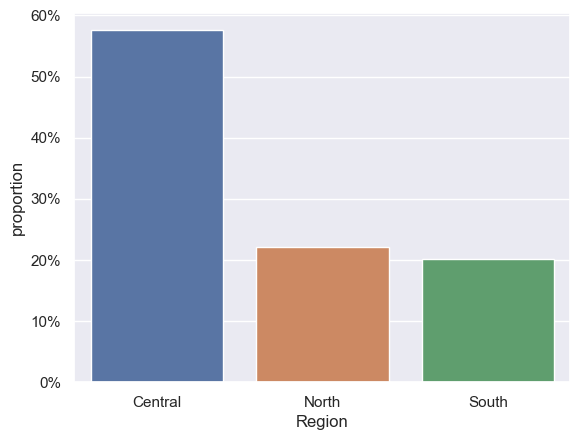

In [27]:
get_vc(df, "Region")

,Country/Region,proportion
0,France,0.251128
1,Germany,0.230822
2,United Kingdom,0.195115
3,Spain,0.126839
4,Italy,0.072297
5,Austria,0.057289
6,Belgium,0.015696
7,Netherlands,0.014028
8,Switzerland,0.006769
9,Sweden,0.006376


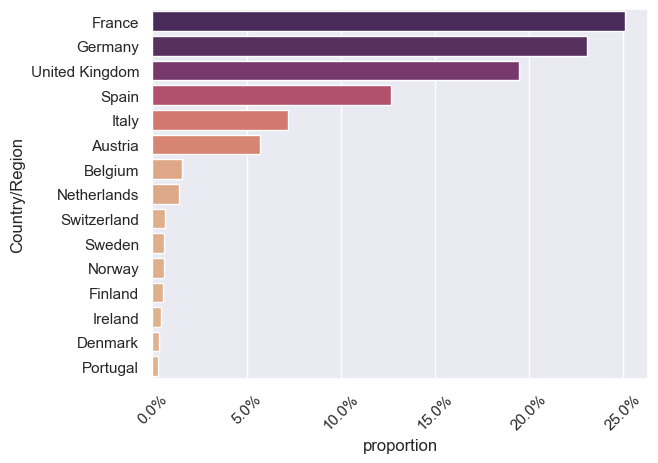

In [28]:
get_vc(df, "Country/Region")

### Category

,Category,proportion
0,Office Supplies,0.601138
1,Furniture,0.215911
2,Technology,0.182951


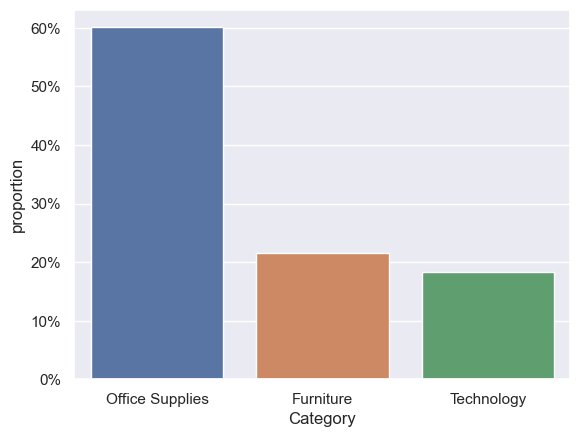

In [29]:
get_vc(df, "Category")

,Sub-Category,proportion
0,Binders,0.252611
1,Paper,0.225849
2,Storage,0.139687
3,Art,0.133975
4,Appliances,0.077350
5,Labels,0.060052
6,Envelopes,0.041775
7,Fasteners,0.037369
8,Supplies,0.031332


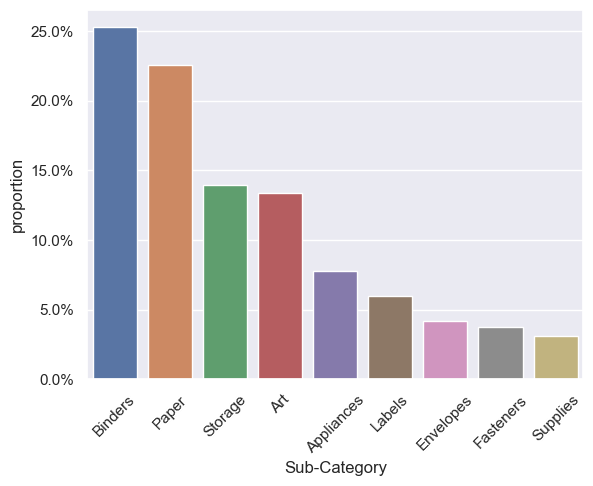

,Sub-Category,proportion
0,Furnishings,0.458428
1,Chairs,0.288051
2,Tables,0.148114
3,Bookcases,0.105407


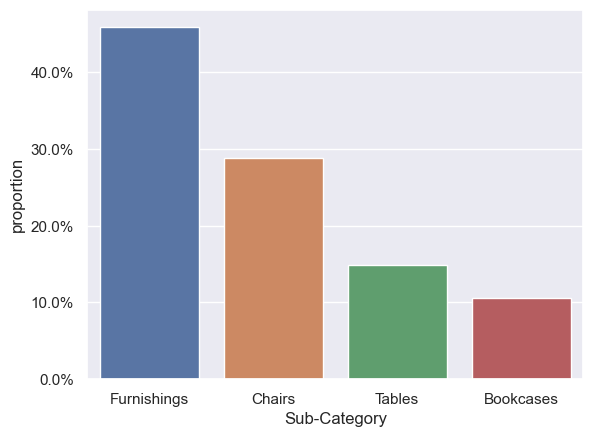

,Sub-Category,proportion
0,Phones,0.484182
1,Accessories,0.415550
2,Machines,0.062735
3,Copiers,0.037534


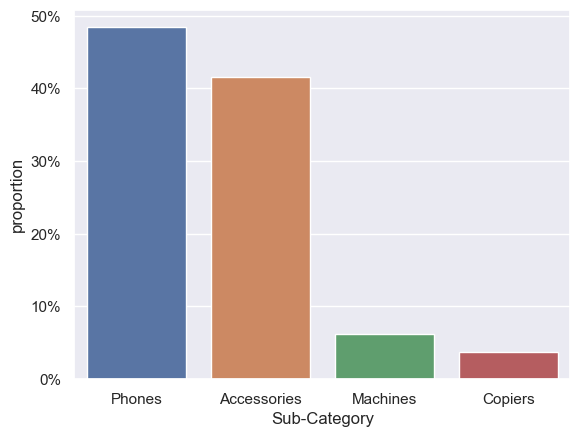

In [30]:
for category in df.Category.unique():
    data = df.loc[df.Category == category]
    get_vc(data, ['Sub-Category'])

### Discount

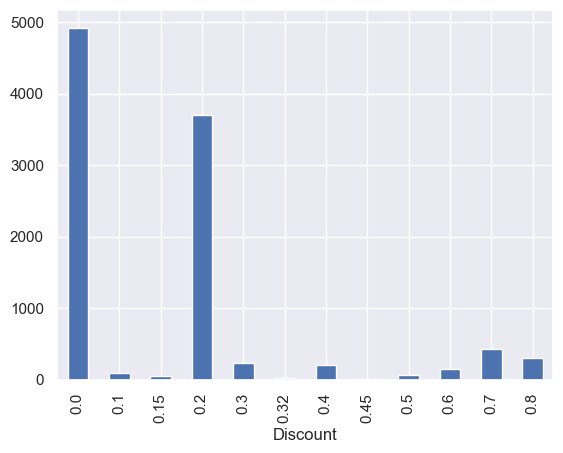

In [31]:
df.Discount.value_counts().sort_index().plot(kind="bar");

<Axes: xlabel='Discount'>

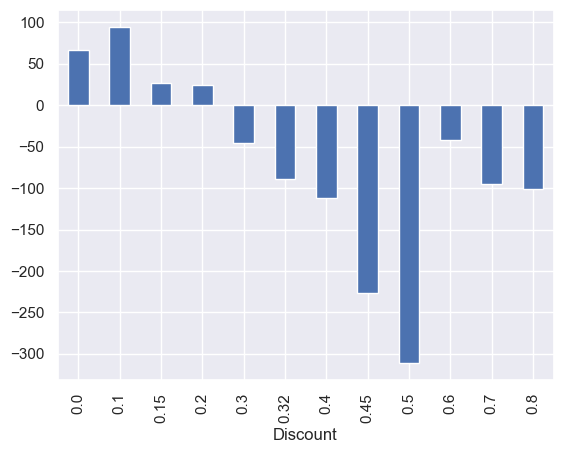

In [32]:
df.groupby('Discount')['Profit'].mean().plot(kind="bar")

### Returned

,Returned,proportion
0,False,0.921522
1,True,0.078478


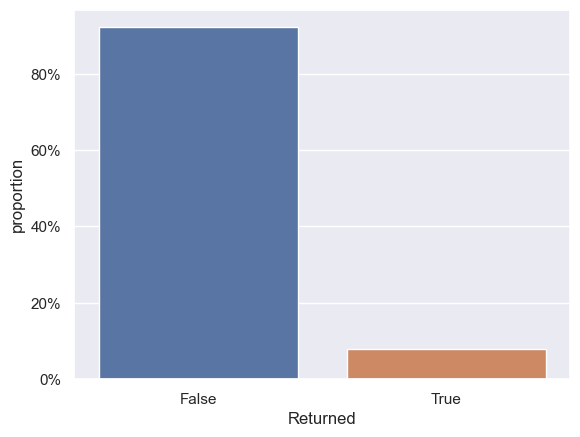

In [33]:
get_vc(df, ['Returned'])

### Regional Manager

,Regional Manager,proportion
0,Emily Burns,0.575731
1,Ross DeVincentis,0.221993
2,Damala Kotsonis,0.202276


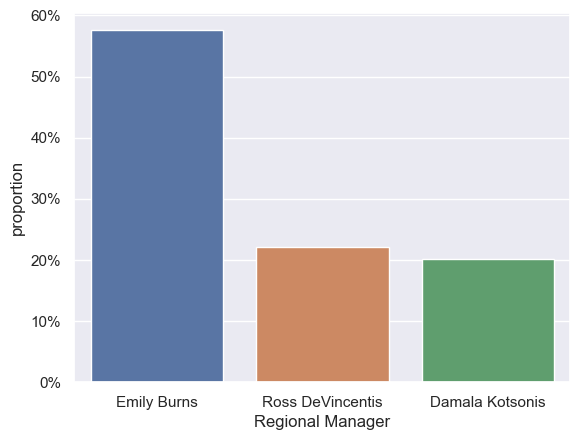

In [34]:
get_vc(df, "Regional Manager")

,Regional Manager,Country/Region
0,Emily Burns,6
1,Ross DeVincentis,6
2,Damala Kotsonis,3


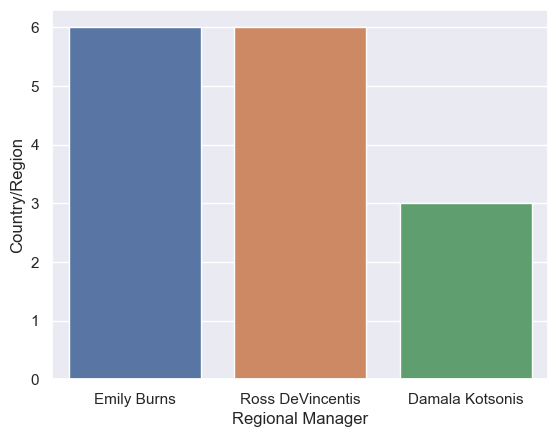

In [35]:
x, y = 'Regional Manager', 'Country/Region'
data = df.groupby(x)[y].nunique().sort_values(ascending=False).reset_index()
display(data)
sns.barplot(data=data, x=x, y=y, hue=x);

In [36]:
x, y = 'Regional Manager', 'Country/Region'
data = df.groupby(x)[y].unique().reset_index()
display(data)


,Regional Manager,Country/Region
0,Damala Kotsonis,"[Spain, Italy, Portugal]"
1,Emily Burns,"[Germany, France, Switzerland, Austria, Netherlands, Belgium]"
2,Ross DeVincentis,"[Sweden, United Kingdom, Denmark, Finland, Norway, Ireland]"


,Regional Manager,Profit per Sale
0,Ross DeVincentis,47.232487
1,Emily Burns,28.461729
2,Damala Kotsonis,8.907764


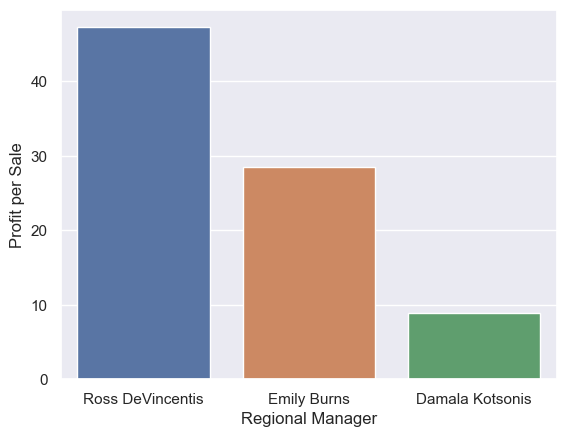

In [37]:
x, y='Regional Manager', 'Profit'
data = df.groupby(x)[y].mean().sort_values(ascending=False).reset_index().rename(columns={"Profit":"Profit per Sale"})
x,y = data.columns
display(data)

sns.barplot(data=data, x=x, y=y, hue=x);

Regional Manager: Emily Burns


,Category,proportion
0,Office Supplies,0.598739
1,Furniture,0.220140
2,Technology,0.181121


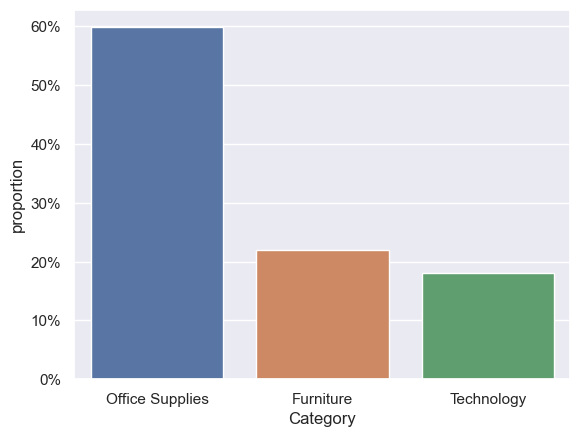

Regional Manager: Damala Kotsonis


,Category,proportion
0,Office Supplies,0.583899
1,Furniture,0.224054
2,Technology,0.192047


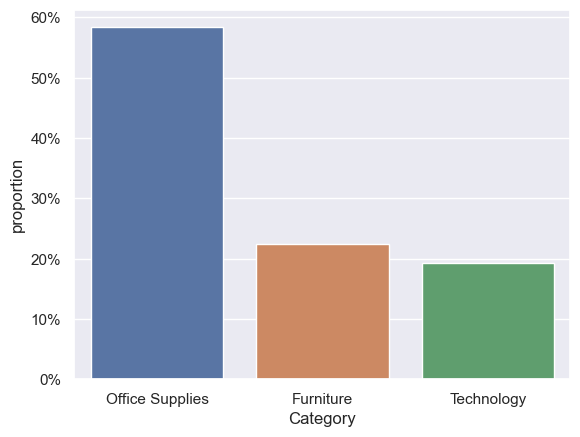

Regional Manager: Ross DeVincentis


,Category,proportion
0,Office Supplies,0.623067
1,Furniture,0.197525
2,Technology,0.179408


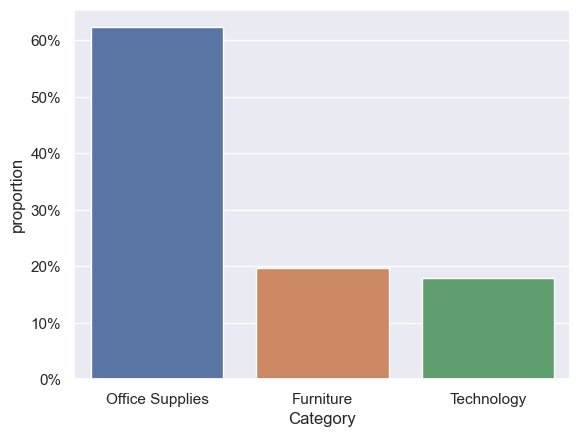

In [38]:
for manager in df['Regional Manager'].unique():
    print("Regional Manager:", manager)
    data = df.loc[df['Regional Manager'] == manager]
    get_vc(data, "Category")

# Quantitative

In [39]:
df.head(1)

,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Regional Manager,Sales Pre-Discount,Unit Price
0,DE-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Hamburg,Hamburg,Germany,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.448,2,0.2,5.5512,False,Emily Burns,20.56,10.28


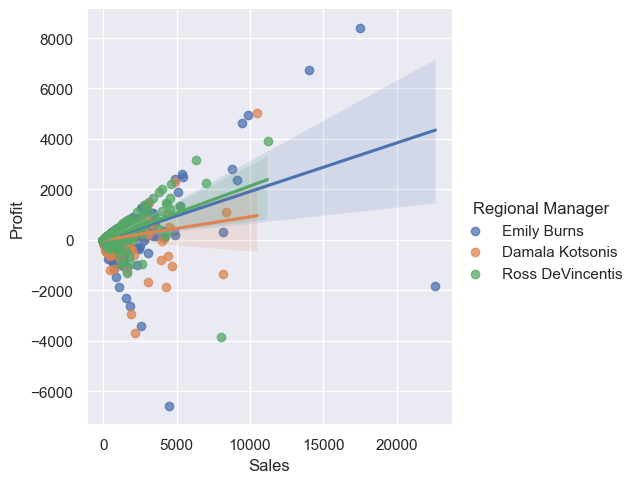

In [40]:
sns.lmplot(data=df, x="Sales", y="Profit", hue='Regional Manager', scatter_kws={"alpha":0.75} );

# Time Series

## Quarter-Year

In [56]:
x='Order Date'
period = 'Q' #Quarter-Year
my = df.groupby(df[x].dt.to_period(period))

### Sales

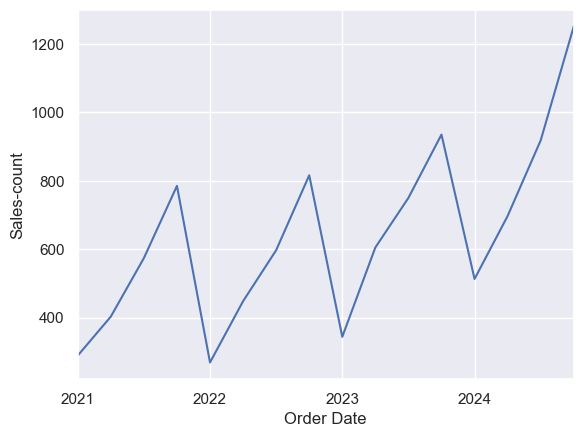

In [59]:
y='Sales'
agg="count"
my[y].agg(agg).plot(kind="line", ylabel=f"{y}-{agg}");

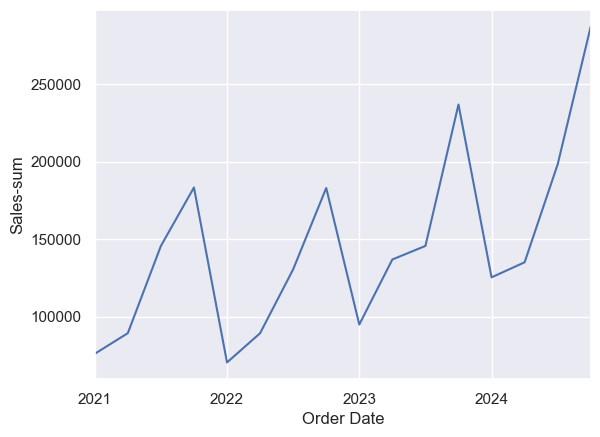

In [60]:
y='Sales'
agg="sum"
my[y].agg(agg).plot(kind="line", ylabel=f"{y}-{agg}");

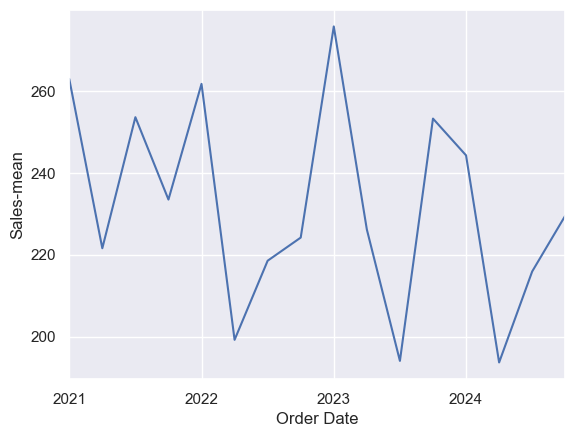

In [61]:
y='Sales'
agg="mean"
my[y].agg(agg).plot(kind="line", ylabel=f"{y}-{agg}");

### Profit

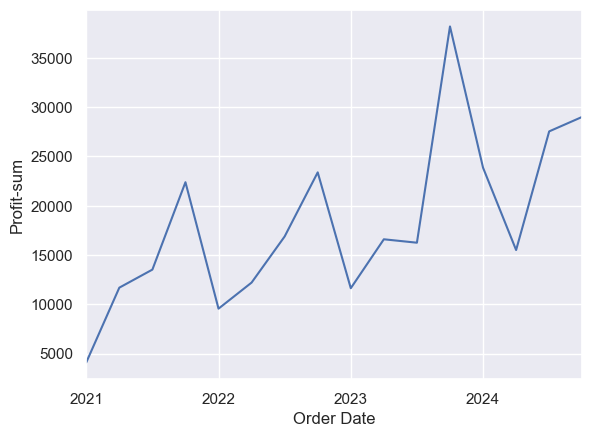

In [62]:
y='Profit'
agg="sum"
my[y].agg(agg).plot(kind="line", ylabel=f"{y}-{agg}");

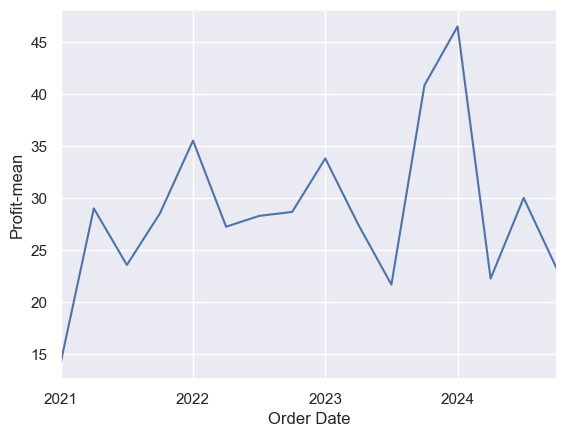

In [63]:
y='Profit'
agg="mean"
my[y].agg(agg).plot(kind="line", ylabel=f"{y}-{agg}");

# Profit

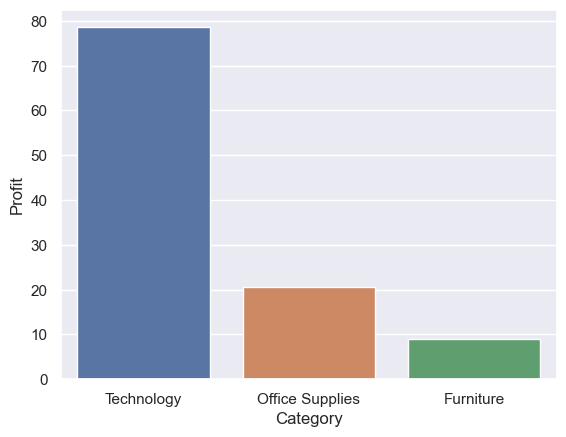

In [66]:
x, y = 'Category', 'Profit'
data1 = df.groupby(x)[y]

agg = "mean"
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
sns.barplot(data=data2, x=x, y=y, hue=x);